# TP monitoring 

This notebook is meant to analyze TP samples and plot some relevant quantities. 
Comparisons can be made between different files.
Set the desired settings in the following block.

You can then change some display options directly in the relevant blocks.

The value of `quantile` changes the range of the histogram to exclude outliers from the visualization. 

`y_min` and `y_max` are the limits of the y-axis in the plots, in case one wants to see some exact values.

In [1]:
# USER SETTINGS

# Append here the path to the TP file(s) to be analyzed
tpFile_path_arr = []
tpFile_path_arr.append("/home/virgolaema/dune/plot_tps/first_file.txt") # using the same for testing
tpFile_path_arr.append("/home/virgolaema/dune/plot_tps/second_file.txt") # using the same for testing
tpFile_path_arr.append("/home/virgolaema/dune/plot_tps/third_file.txt") # using the same for testing

# Max number of TPs to load
n_TPs = 100000

# Display options, applies to all plots
superimpose = True # if True, superimpose the plots of the different files


# not recommended to have more than 4 at the same time, visualization will be difficult
if len(tpFile_path_arr) > 4:
    print("WARNING: more than 4 files to compare, are you sure?")

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from include.TriggerPrimitive import TriggerPrimitive as TriggerPrimitive
from include.PlottingUtils import *

In [3]:
# read the file(s) and create arrays of TPs, using the class in TriggerPrimitive.py
# the code will deduce if the file is coming from offline or online data

tps_lists = []
file_is_offline = [] # index i is True if the file i is offline data, matching tps_lists[i]
for tpFile_path in tpFile_path_arr:
    
    this_tps_list = saveTPs(tpFile_path, n_TPs)
    # order them basing on start_time
    this_tps_list.sort(key=lambda x: x.time_start)
    tps_lists.append(this_tps_list)
    print ("This file will be identified as: " + tpFile_path.split("/")[-1])
    print (' ')
    
    # check if the file is offline or online
    if (this_tps_list[0].event_number == 0):
        file_is_offline.append(True)
    else:
        file_is_offline.append(False)

File  /home/virgolaema/dune/plot_tps/first_file.txt  comes from LArSoft
This file will be identified as: first_file.txt
 
File  /home/virgolaema/dune/plot_tps/second_file.txt  comes from LArSoft
This file will be identified as: second_file.txt
 
File  /home/virgolaema/dune/plot_tps/third_file.txt  comes from LArSoft
This file will be identified as: third_file.txt
 


### Plotting TP variables

In the following blocks, the TP variables are plotted.


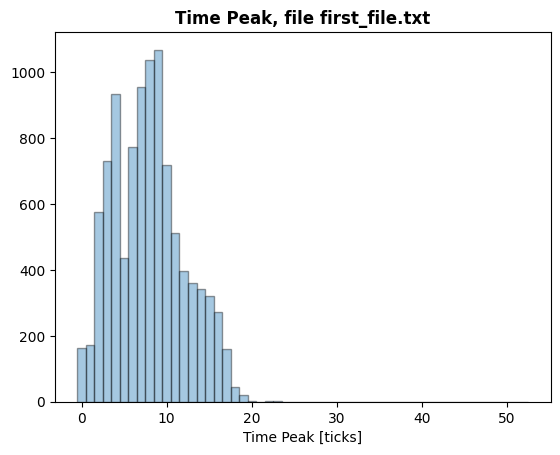

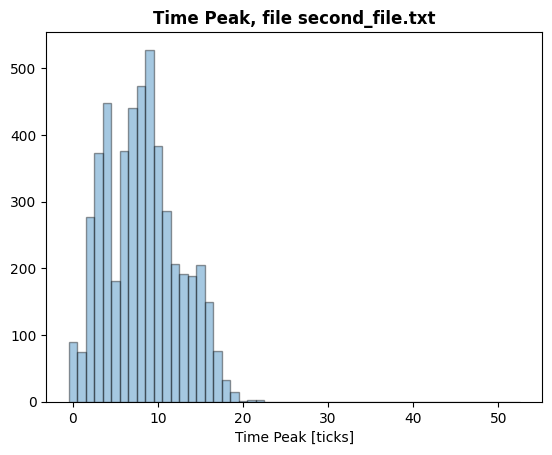

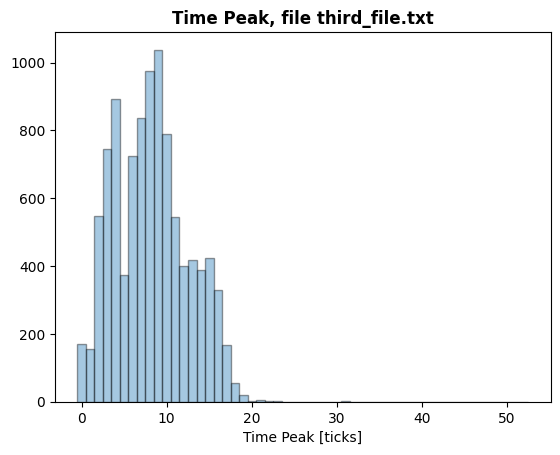

In [4]:

# TIME PEAK DISTRIBUTION
# note that the value is plotted after subtracting time_start from the time_peak timestamp

plotTimePeak(tps_lists, tpFile_path_arr, 
             superimpose=superimpose, 
             quantile=1, 
             y_min=None, y_max=None) # remove the argument(s) to fall back to default

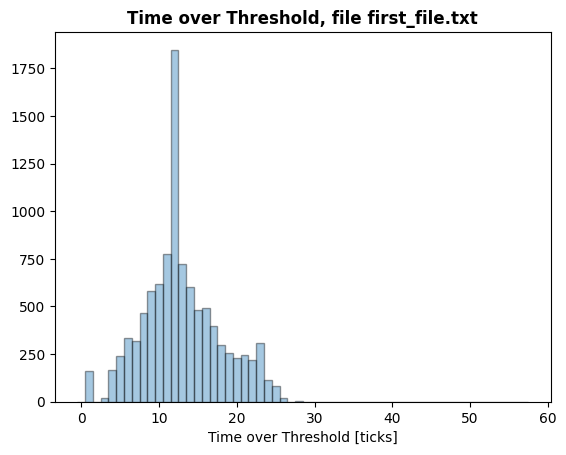

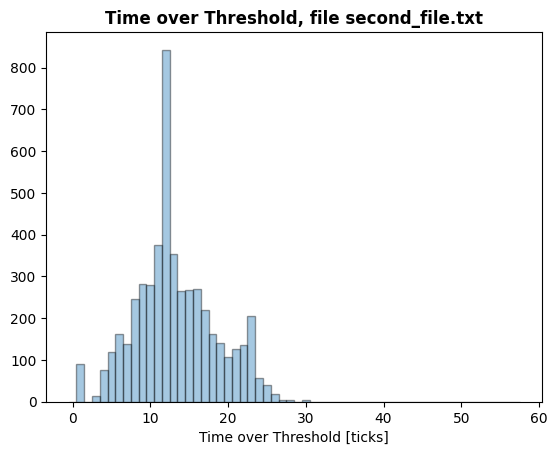

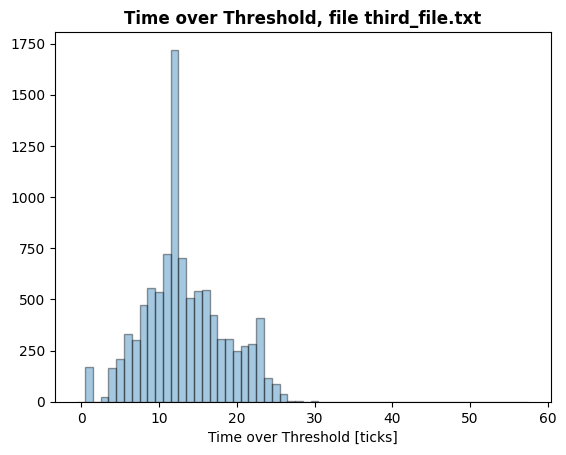

In [5]:
# TIME OVER THRESHOLD DISTRIBUTION

plotTimeOverThreshold(tps_lists, tpFile_path_arr, 
                      superimpose=superimpose, 
                      quantile=1, 
                      y_min=None, y_max=None)

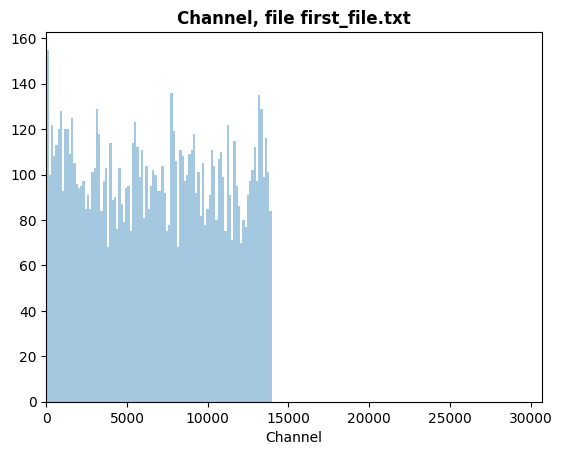

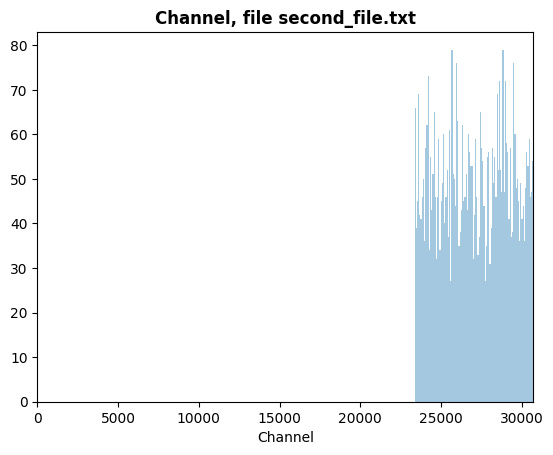

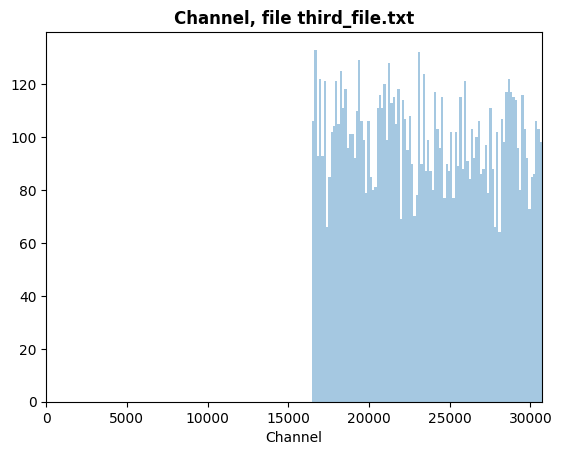

In [6]:
# CHANNEL DISTRIBUTION
  
# TIME OVER THRESHOLD DISTRIBUTION

plotChannel(tps_lists, tpFile_path_arr, 
                      superimpose=superimpose, 
                      x_min=0, x_max=None, # set 2560 to show only one APA
                      y_min=0, y_max=None)


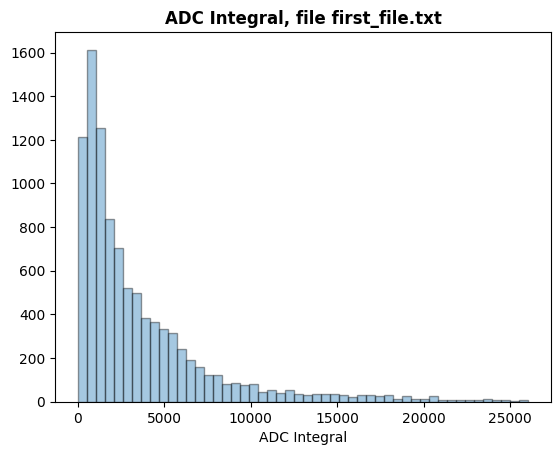

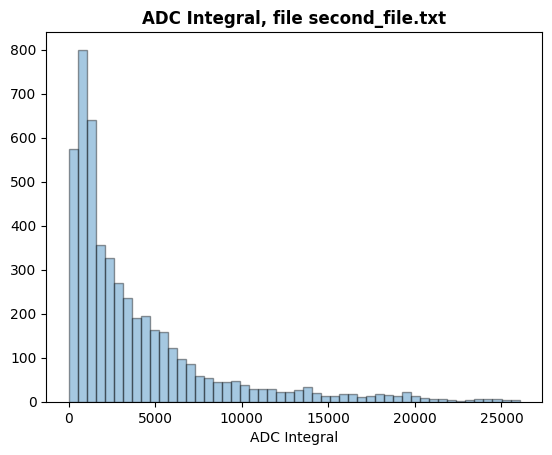

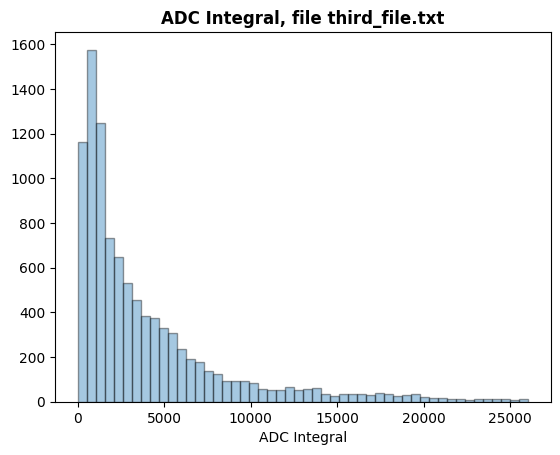

In [7]:
# ADC INTEGRAL DISTRIBUTION

plotADCIntegral(tps_lists, tpFile_path_arr,
                superimpose=superimpose,
                quantile=0.99,
                y_min=None, y_max=None)

In [8]:
# ADC PEAK DISTRIBUTION

plotADCPeak(tps_lists=tps_lists, tpFile_path_arr=tpFile_path_arr,
            superimpose=superimpose,
            quantile=0.8,
            y_min=None, y_max=None)        

TypeError: plotADCPeak() got an unexpected keyword argument 'tpFile_path_arr'

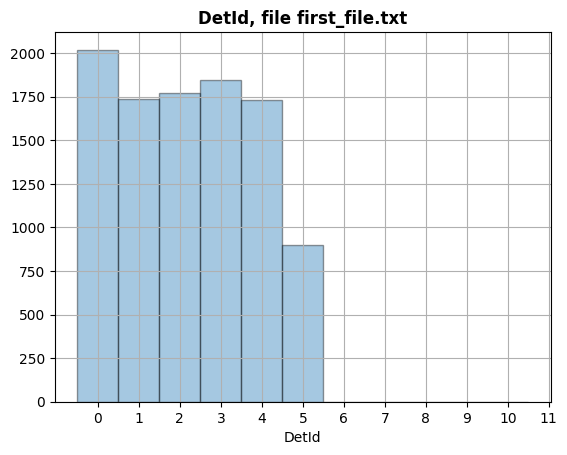

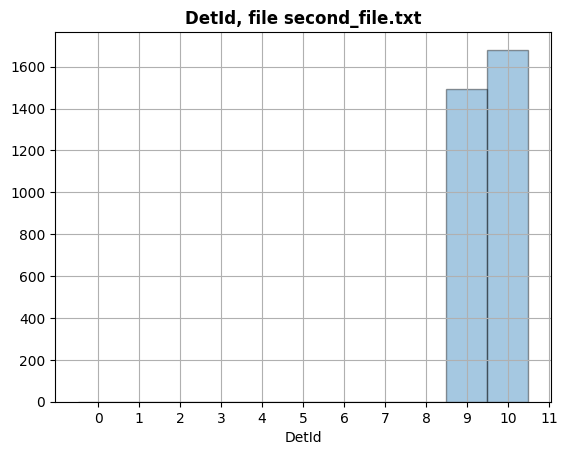

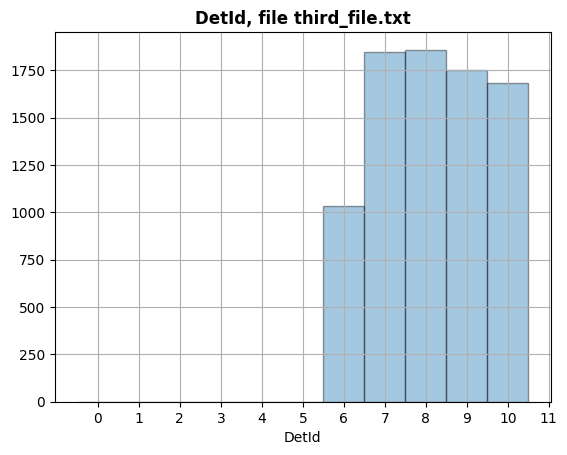

In [ ]:
# DET ID DISTRIBUTION

plotDetId(tps_lists, tpFile_path_arr,
            superimpose=superimpose,
            quantile=1, # doesn't make sense to change it, but still possible
            y_min=None, y_max=None)